In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(10,10)})

# Problem 4: Central Limit Theorem

/home/alon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


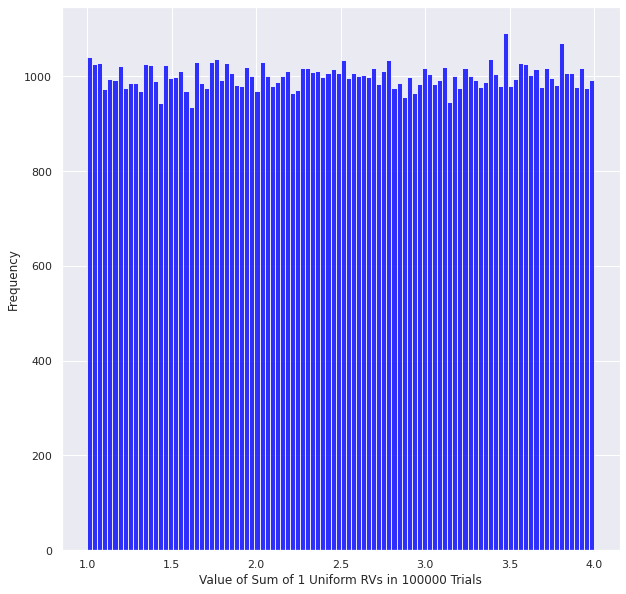

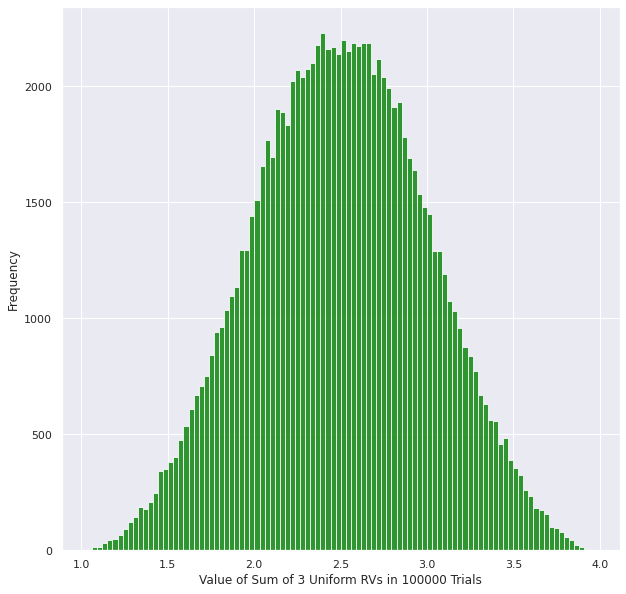

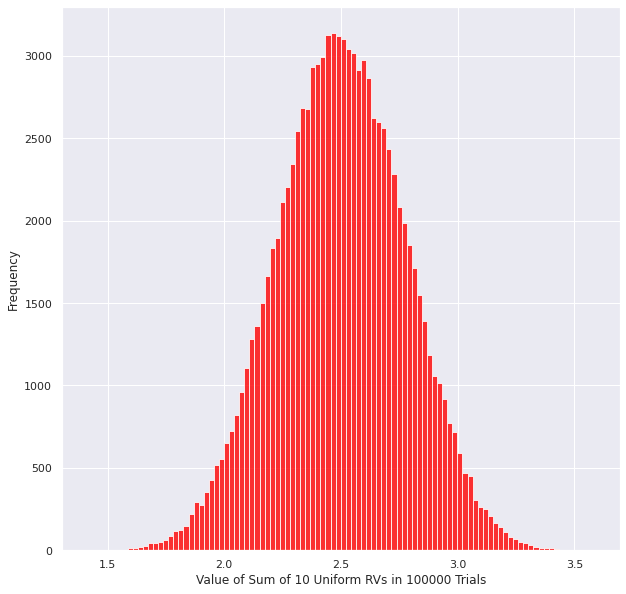

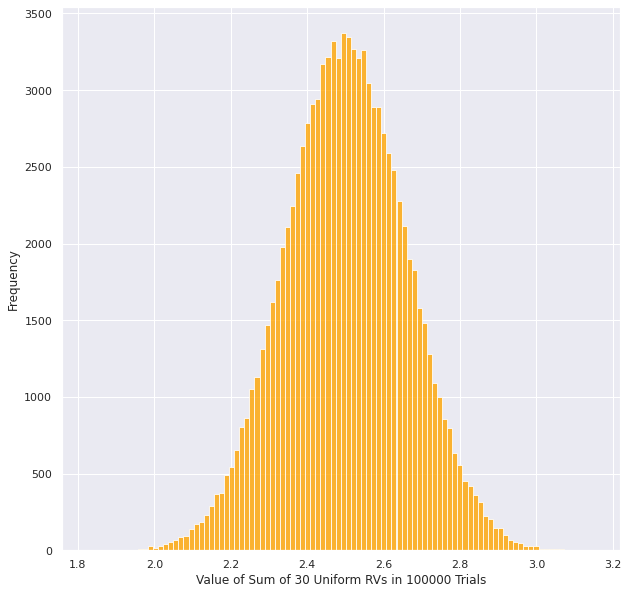

In [3]:
n_vec = [1, 3, 10, 30]
n_trials = 100000

colors = ['blue', 'green', 'red', 'orange']

def get_xi():
    return np.random.uniform(1, 4)

#for each value of n in the Zn sum
for n in n_vec:
    
    #instantiate the sums placeholder list
    sums = []
    
    #do a large number of trials for simulation
    for i in range(0, n_trials):
        
        #instatniate values placeholder list for each of the n RVs to sum
        values = []
        
        #compute the terms and add to values list
        for j in range(0, n):
            value = get_xi()
            values.append(value)
        
        #now that we have the values for each of the Xi's, we can sum them up.
            #need to scale by n if we want them to take on the same distribution
        sums.append(np.sum(values)/n)
        
    plt.figure()

    ax = sns.distplot(sums,
              bins=100,
              label="n={}".format(n),
              kde=False,
              color=colors[n_vec.index(n)],
              hist_kws={"linewidth": 1,'alpha':0.8})
    ax.set(xlabel='Value of Sum of {} Uniform RVs in {} Trials'.format(n, n_trials), ylabel='Frequency')
    #ax.legend()
    

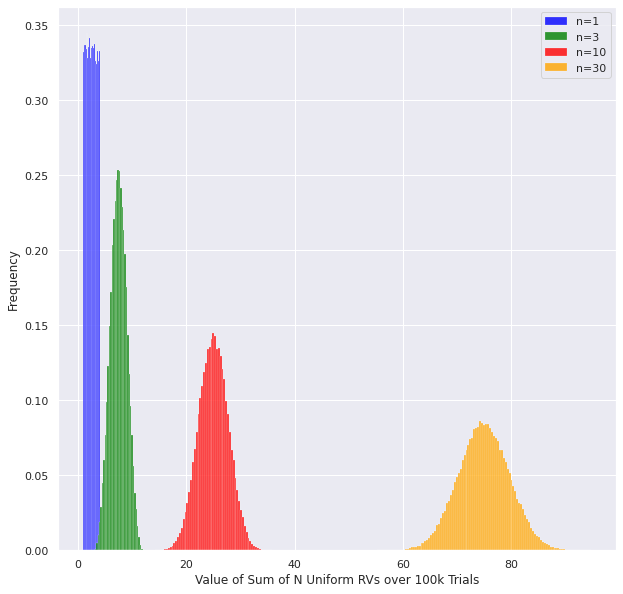

In [4]:
n_vec = [1, 3, 10, 30]
n_trials = 100000

colors = ['blue', 'green', 'red', 'orange']

def get_xi():
    return np.random.uniform(1, 4)

sums_list = []

for n in n_vec:
    sums = []
    
    for i in range(0, n_trials):
        
        values = []
        
        for j in range(0, n):
            value = get_xi()
            values.append(value)

        sums.append(np.sum(values))
        
    #plt.figure()
    sums_list.append(sums)

    
    #change the variable to plot to "sums" instead of the list comprehension for unscaled versions
    ax = sns.distplot(sums,
              bins=int(20*np.sqrt(n)),
              hist=True,
              label="n={}".format(n),
              kde=False,
              color=colors[n_vec.index(n)],
              hist_kws={"linewidth": 0.25,'alpha': 0.8, "density": True})
    ax.set(xlabel='Value of Sum of N Uniform RVs over {}k Trials'.format(int(n_trials/1000)), ylabel='Frequency')
    ax.legend()

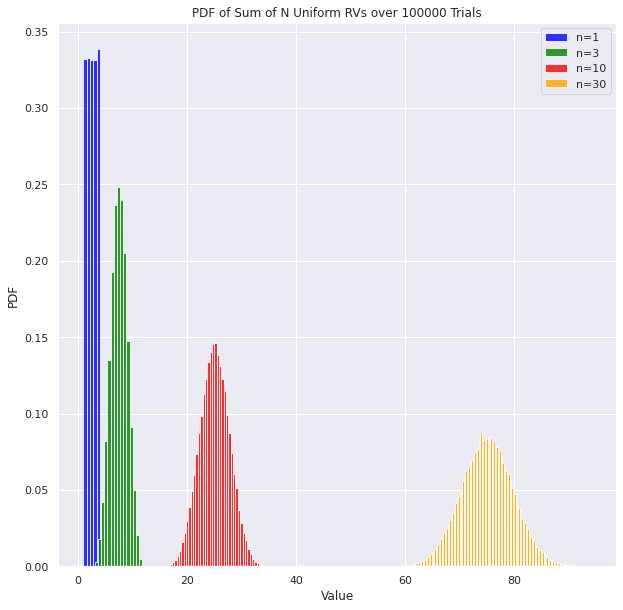

In [88]:
#Doing the same thing using matplotlib and pandas
df = pd.DataFrame(sums_list)
df = df.transpose()
df.columns = n_vec

for n in n_vec:
    #hist, bin_edges = np.histogram(df[n], bins=1000, density=True)
    #plt.figure()
    nn, bins, patches = plt.hist(df[n],
                                int(5*n), #scale the number of bins based on how close together they'll be
                                density=True,
                                facecolor=colors[n_vec.index(n)],
                                alpha=0.8,
                                label="n={}".format(n))
    plt.xlabel("Value")
    plt.ylabel("PDF")
    plt.title('PDF of Sum of N Uniform RVs over {} Trials'.format(n_trials))
    
plt.legend()

/home/alon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

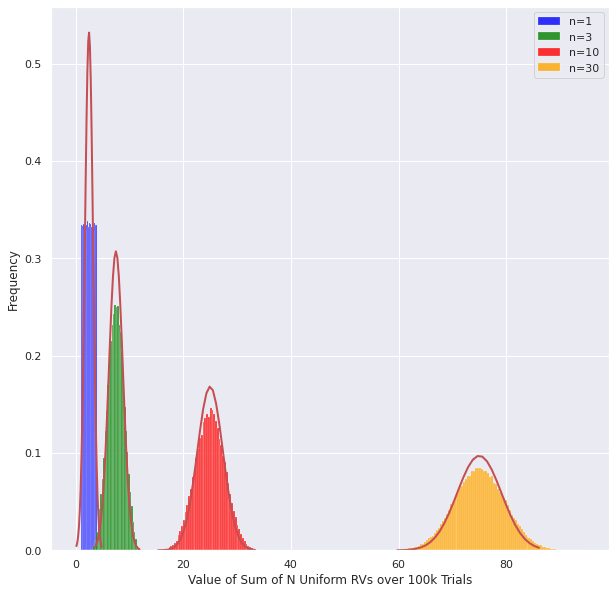

In [5]:
## Part c: superimposing a gaussian:

n_vec = [1, 3, 10, 30]
n_trials = 100000

colors = ['blue', 'green', 'red', 'orange']

def get_xi():
    return np.random.uniform(1, 4)

sums_list = []


plt.figure()
for n in n_vec:
    sums = []
    
    for i in range(0, n_trials):
        
        values = []
        
        for j in range(0, n):
            value = get_xi()
            values.append(value)

            
        sums.append(np.sum(values))
        #Y = (np.sum(values)/np.sqrt(n)) + 2.5*(1-np.sqrt(n))
        #sums.append(Y)
    
    sums_list.append(sums)

    ax = sns.distplot(sums,
              bins=int(20*np.sqrt(n)),
              hist=True,
              label="n={}".format(n),
              kde=False,
              color=colors[n_vec.index(n)],
              hist_kws={"linewidth": 0.25,'alpha': 0.8, "density": True})
    ax.set(xlabel='Value of Sum of N Uniform RVs over {}k Trials'.format(int(n_trials/1000)), ylabel='Frequency')
    ax.legend()
    
    #generate the gaussian
    mu, sigma = 2.5*n, 0.75*np.sqrt(n) # mean and standard deviation
    s = np.random.normal(mu, sigma, 1000)

    hist, bins = np.histogram(s, 30, density=True)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')

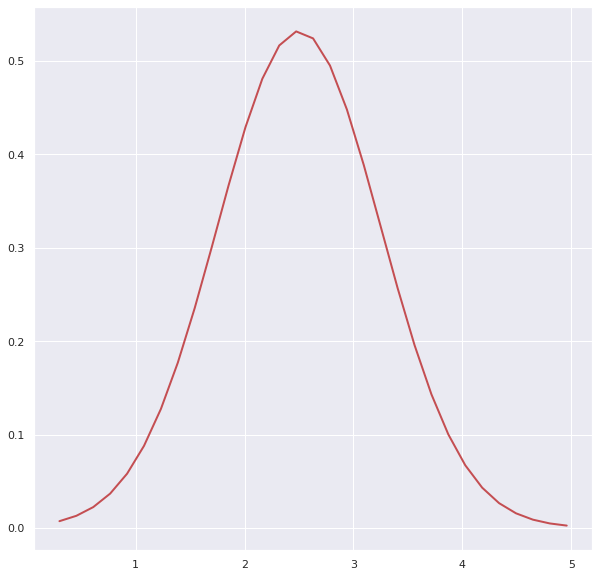

In [13]:
#generate the gaussian
mu, sigma = 2.5, 0.75 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

hist, bins = np.histogram(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')

## Part d: discrete case

/home/alon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

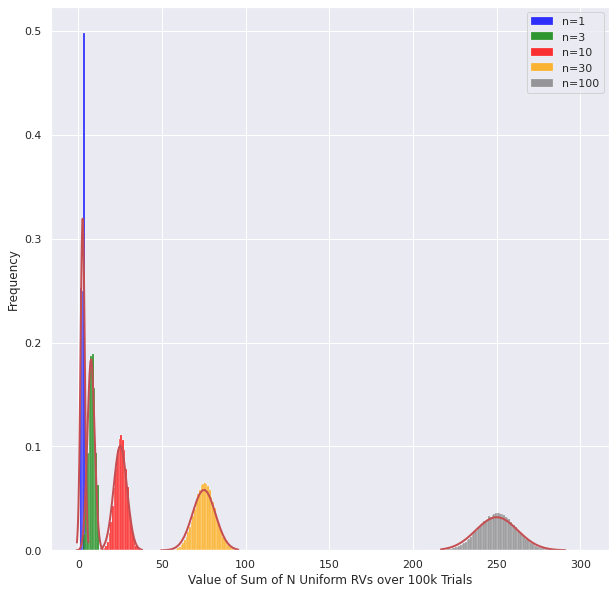

In [40]:
n_vec = [1, 3, 10, 30, 100]
n_trials = 100000

die = np.arange(1,5)
probs_unbiased = [(1/4)]*4

colors = ['blue', 'green', 'red', 'orange', 'gray']


def get_xi():
    return np.random.choice(die, p=probs_unbiased) #throw the fair die t times

sums_list = []
plt.figure()

for ix, n in enumerate(n_vec):
    #print(i)
    #print(bin_widths[i])
    sums = []
    
    for i in range(0, n_trials):
        
        values = []
        
        for j in range(0, n):
            value = get_xi()
            values.append(value)

            
        sums.append(np.sum(values))
        #Y = (np.sum(values)/np.sqrt(n)) + 2.5*(1-np.sqrt(n))
        #sums.append(Y)
    
    sums_list.append(sums)
    
    ran = max(sums) - min(sums)

    ax = sns.distplot(sums,
              bins=ran,
              hist=True,
              label="n={}".format(n),
              kde=False,
              color=colors[n_vec.index(n)],
              hist_kws={"linewidth": 0.25,'alpha': 0.8, "density": True})
    ax.set(xlabel='Value of Sum of N Uniform RVs over {}k Trials'.format(int(n_trials/1000)), ylabel='Frequency')
    ax.legend()
    
    #generate the gaussian
    mu, sigma = 2.5*n, 1.25*np.sqrt(n) # mean and standard deviation
    s = np.random.normal(mu, sigma, 1000)

    hist, bins = np.histogram(s, 30, density=True)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')

In [37]:
print(die)

[1 2 3 4]


In [15]:
for i, n in enumerate(n_vec):
    print(n)

1
3
10
30
